In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

orderbook = "../datasets/PTP/GOOGL_2018-07-02_34200000_57600000_orderbook_10.csv"
message = "../datasets/PTP/GOOGL_2018-07-02_34200000_57600000_message_10.csv"
num_levels = 10

header_list = []
for i in range(num_levels):
    header_list = header_list + ["Pa%d"%(i+1),"Va%d"%(i+1),"Pb%d"%(i+1),"Vb%d"%(i+1)]
df_orderbook = pd.read_csv(orderbook,header=None,names=header_list)

df_message = pd.read_csv(message,usecols = [0,1,3,4,5], names=['time', 'type','size','price','direction'])
df_message.index = pd.Timestamp(datetime.date.today()) + pd.TimedeltaIndex(df_message.time, unit='s')
df_orderbook.index = df_message.index

# Spreads and mid-prices
def feature_v2(num_levels,df):
    for i in range(1,num_levels+1):
        df["spread%d"%(i)] = df["Pa%d"%(i)] - df["Pb%d"%(i)]
        df["midprice%d"%(i)] = (df["Pa%d"%(i)] + df["Pb%d"%(i)])/2
    return df

def feature_v3(num_levels,df):
    for i in range(1, num_levels):
        df["PA_diff%d"%(i)] = df["Pa%d"%(i+1)] - df["Pa%d"%(i)]
        df["PB_diff%d"%(i)] = df["Pb%d"%(i)] - df["Pb%d"%(i+1)]
    return df

def feature_v4(num_levels,df):
    lst = ["Pa%d"%(i+1) for i in range(num_levels)]
    df["Pa_mean"] = df[df.columns.intersection(lst)].sum(axis=1)    
    
    lst = ["Pb%d"%(i+1) for i in range(num_levels)]
    df["Pb_mean"] = df[df.columns.intersection(lst)].sum(axis=1)
    
    lst = ["Va%d"%(i+1) for i in range(num_levels)]
    df["Va_mean"] = df[df.columns.intersection(lst)].sum(axis=1)
    
    lst = ["Vb%d"%(i+1) for i in range(num_levels)]
    df["Vb_mean"] = df[df.columns.intersection(lst)].sum(axis=1)
    return df

def feature_v5(num_levels,df): # accum differences
    for i in range(num_levels):
        df["pri_accum_diff%d"%(i+1)] = 0
        df["vol_accum_diff%d"%(i+1)] = 0
        for k in range(i):
            df["pri_accum_diff%d"%(i+1)] += (df["Pa%d"%(k+1)] - df["Pb%d"%(k+1)])
            df["vol_accum_diff%d"%(i+1)] += (df["Va%d"%(i+1)] - df["Vb%d"%(i+1)])
    return df

In [79]:
df_orderbook = feature_v2(num_levels,df_orderbook)
df_orderbook = feature_v3(num_levels,df_orderbook)
df_orderbook = feature_v4(num_levels,df_orderbook)
df_orderbook = feature_v5(num_levels,df_orderbook)

In [80]:
df_orderbook.head()

,Pa1,Va1,Pb1,Vb1,Pa2,Va2,Pb2,Vb2,Pa3,Va3,...,pri_accum_diff6,vol_accum_diff6,pri_accum_diff7,vol_accum_diff7,pri_accum_diff8,vol_accum_diff8,pri_accum_diff9,vol_accum_diff9,pri_accum_diff10,vol_accum_diff10
2019-12-09 09:30:00.001513,11177800,44,11165500,128,11227100,100,11144200,66,11280000,2,...,750200,495,1142100,0,1793100,0,2575000,1600,3438800,0
2019-12-09 09:30:00.006005,11177800,44,11165500,127,11227100,100,11144200,66,11280000,2,...,750200,495,1142100,0,1793100,0,2575000,1600,3438800,0
2019-12-09 09:30:00.007099,11177800,44,11165500,127,11227100,100,11158600,5,11280000,2,...,693200,205,1073500,594,1512300,0,2226300,1600,3021400,0
2019-12-09 09:30:00.008490,11177800,44,11165500,127,11227100,100,11158600,5,11280000,2,...,693200,205,1073500,594,1512300,0,2161900,1600,2889100,0
2019-12-09 09:30:00.009083,11177800,44,11165500,127,11227100,100,11158600,5,11280000,2,...,685400,-270,993800,594,1385700,0,1972300,0,2686300,1800


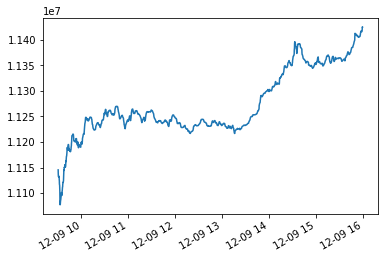

In [93]:
window = 1000
df_orderbook['midprice_win%d'%window] = df_orderbook.rolling(window).agg({'midprice1':'mean'})
df_orderbook['midprice_win%d'%window].plot()

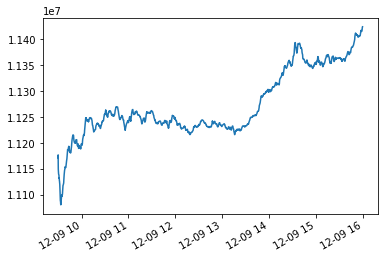

In [103]:
window = '1MIN'
df_orderbook['midprice_average'+window] = df_orderbook.rolling('1MIN').agg({'midprice1':'mean'})
df_orderbook['midprice_average'+window].plot()

In [105]:
df_orderbook1s = df_orderbook.resample('1S').first()

In [109]:
df_orderbook1s["label"] = df_orderbook1s['midprice1'].shift(-600)

In [108]:
df_orderbook1s.head()

,Pa1,Va1,Pb1,Vb1,Pa2,Va2,Pb2,Vb2,Pa3,Va3,...,vol_accum_diff8,pri_accum_diff9,vol_accum_diff9,pri_accum_diff10,vol_accum_diff10,midprice_win100,midprice_win1000,midprice_1MIN,midprice_average1MIN,label
2019-12-09 09:30:00,11177800.0,44.0,11165500.0,128.0,11227100.0,100.0,11144200.0,66.0,11280000.0,2.0,...,0.0,2575000.0,1600.0,3438800.0,0.0,11165574.0,NaN,1.117165e+07,1.117165e+07,11133500.0
2019-12-09 09:30:01,11173000.0,30.0,11150700.0,47.0,11173100.0,5.0,11150000.0,1118.0,11179000.0,43.0,...,-168.0,355400.0,272.0,496000.0,9.0,11157344.5,NaN,1.116208e+07,1.116208e+07,11136050.0
2019-12-09 09:30:02,11156300.0,1.0,11140000.0,175.0,11159300.0,30.0,11139600.0,100.0,11160500.0,30.0,...,-749.0,258000.0,120.0,315800.0,-684.0,11151097.5,NaN,1.115800e+07,1.115800e+07,11136550.0
2019-12-09 09:30:03,11150500.0,5.0,11140000.0,185.0,11150600.0,100.0,11139600.0,100.0,11154500.0,21.0,...,42.0,209500.0,1000.0,263500.0,-180.0,11148086.5,NaN,1.115649e+07,1.115649e+07,11136050.0
2019-12-09 09:30:04,11150500.0,5.0,11140000.0,185.0,11150600.0,100.0,11139600.0,100.0,11151800.0,25.0,...,175.0,178200.0,-152.0,223300.0,1125.0,11145910.0,NaN,1.115533e+07,1.115533e+07,11133850.0


In [84]:
duration = '1min'
label = df_orderbook.resample(duration).agg({'midprice1':'last'})

In [85]:
label.shape

(390, 1)

In [72]:
= df_orderbook.resample('5MIN').agg({'midprice1':'last'})

In [ ]:
df_message = pd.read_csv(message,usecols = [0,1,3,4,5], names=['time', 'type','size','price','direction'])
df_message.index = pd.Timestamp(datetime.date.today()) + pd.TimedeltaIndex(df_message.time, unit='s')

In [ ]:
df_message.head()

In [ ]:
df_orderbook.index = df_message.index
df_orderbook.head()

In [ ]:
df_orderbook.describe()

In [ ]:
# construction of features
https://davidsevangelista.github.io/post/basic_statistics_order_imbalance/

# Order imbalance 

In [ ]:
# create order imbalance 
df_orderbook["imb1"] = (df_orderbook['bid_size1'] - df_orderbook['ask_size1']) / (df_orderbook['bid_size1'] + df_orderbook['ask_size1'])

In [ ]:
df_all = pd.concat([df_message, df_orderbook],axis=1)

In [ ]:
plt.acorr(df_all['imb1'])
plt.show()

In [ ]:
df_all['imb1'].describe()

In [ ]:
def regime(a):
    if a < -0.741379: 
        reg = 1
    elif a < 0:
        reg = 2
    elif a < 0.720930:
        reg = 3
    else:
        reg = 4
    return reg

df_all['imb1_reg'] = list(map(regime, df_all.copy()["imb1"]))

In [ ]:
df_all["imb_previous"] = df_all['imb1_reg'].shift(1)

In [ ]:
df_trade = df_all[(df_all['type'] == 4) | (df_all['type'] == 5)]

In [ ]:
df_trade.groupby(["imb_previous","direction"]).count()[['time']]

In [ ]:
df_trade.columns

In [ ]:
df_sell = df_trade[df_trade['direction']==1].resample("1min").agg({'size':'sum'})
df_buy = df_trade[df_trade['direction']==-1].resample("1min").agg({'size':'sum'})
df_trade_volume = pd.concat([df_sell.rename(columns={'size':'sell'}),df_buy.rename(columns={'size':'buy'}), df_mo]
                            ,axis=1)
df_trade_volume["direction"] = df_trade.resample("1min").agg({'direction':'first'}).shift(-1)

In [ ]:
df_trade_volume.head()
df_trade_volume["imb"] = (df_trade_volume['buy'] - df_trade_volume['sell']) / (df_trade_volume['buy'] + df_trade_volume['sell'])
df_trade_volume['imb_reg'] = list(map(regime, df_trade_volume.copy()["imb"]))
df_trade_volume.dropna(inplace=True)

In [ ]:
type(df_trade_volume['imb'])

In [ ]:
plt.acorr(df_trade_volume['imb'])
plt.show()

In [ ]:
# predicting the volume for the next period

In [ ]:
# predicting next trade direction

In [ ]:
# predicting next limit order direction

In [ ]:
# prediction total order of 10 levels

In [ ]:
!python -V